# ( A1.2 Regresión lineal simple)         
                                                                                                       Fernando Ariel Lozano Castillo

1. Primero veremos cuáles son los países más felices, así como los que tienen mayor 
GDP. Imprimiendo en consola un resumen de 10 filas de la base de datos, previamente 
ordenada de mayor a menor felicidad. Mediante el  uso de la función 
**`“sort_values()”`** y el parámetro **`“ascending”`** con valor **“False”** , esto debido a que si solo se pone **by** el orden sería  de menor a mayor, especificando como primer parámetro el nombre de la columna de interés. Luego guardándolo en la variable **"Mafelicidad"** y después imprimir el resumen.

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

data = pd.read_csv("Felicidad y GDP.csv")
Mafelicidad = data.sort_values(by = "Felicidad", ascending = False)
print("Los 10 países más felices son : ", Mafelicidad.head(10))

Los 10 países más felices son :            Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11


Ahora el mismo el proceso, pero ahora ordenando la base de datos de mayor a menor GDP. Y guardándolos en la variable MaGDP, para que se vea más legible el codigo.

In [26]:
MaGDP = data.sort_values(by = "GDP" , ascending = False)
print("Los 10 países con mayor GDP son : ", MaGDP.head(10))

Los 10 países con mayor GDP son :                 Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12


2. **Graficamos las observaciones**, definiendo el valor de **“y”** como el nivel de felicidad y el valor 
de **“x”** como el logaritmo base 10 del GDP.
Típicamente, cuando trabajamos con números 
tan grandes como lo es el GDP, es mucho más común encontrar asociaciones con el 
logaritmo base 10 de la variable, que con la variable misma. Esto no es un problema, 
siempre y cuando nuestra conclusión incluya este recordatorio. Es decir, si descubrimos 
que sí existe una asociación, diríamos que: ***“encontramos una asociación 
estadísticamente significativa entre los niveles de felicidad y el logaritmo base 10 del 
GDP”.***


Para esto usaremos la librería numpy que tiene la función “`log10()`” para transformar el GDP. 
Además usaremos **matplotlib inline** que  permite mostrar gráficos de Matplotlib directamente en las celdas del notebook, en lugar de abrirlos en una ventana externa.  

In [40]:
%matplotlib inline

Ahora asignamos los variables de **X** y **Y**

In [47]:
X = np.log10(data.GDP)
Y= data.Felicidad

Posteriormente, generaremos una gráfica de dispersión con la función `scatter()` de matplotlib.pyplot, por lo que también deberemos importar dicha librería. En esta ocasión, también nos interesa que los ejes estén etiquetados de forma clara. Lograremos esto con las funciones `ylabel()`y `xlabel()` de la misma librería. Finalmente, desplegaremos la gráfica en la consola con la función `show()`

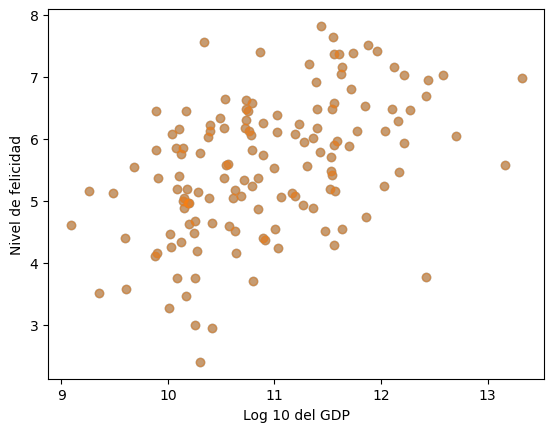

In [54]:
plt.scatter(X,Y , alpha = 0.5)

plt.ylabel("Nivel de felicidad")
plt.xlabel("Log 10 del GDP")
plt.show()

3. Ahora calculamos los valores óptimos de los dos coeficientes del modelo de regresión lineal simple.
Para no terminar con una línea de código muy extensa, proclive a error humano, dividiremos la ecuación de $\beta_1$ en dos partes: el numerador y el denominador. Ya que necesitamos utilizar el promedio tanto de `x` como de `y`, primero generaremos un par de variables de nombre `xBar` y `yBar` donde almacenaremos esa información. Para lograrlo, usaremos la función `mean` de pandas, por lo que primero importaremos dicha librería.

Posteriormente calcularemos el numerador `B1num` y denominador `B1den` de $\beta_1$ de forma independiente, recordando usar la función `sum` para obtener la sumatoria de los términos.Después definiremos una variable de nombre `B1` como la división de `B1num` entre `B1den`, y una variable de nombre `B0` de acuerdo a lo que indica la siguiente ecuación. Finalmente, imprimiremos el valor de cada coeficiente en la consola con dos llamadas a la función `print`.<br><br>

 <img src = 'Eclinea.png'>

In [66]:
# Calcula el promedio de x
xBar=np.mean(X)

# Calcula el promedio de y
yBar=np.mean(Y)

# Calcula el numerador de B1 apoyándote de la función sum
B1num=sum((x-xBar)*(y-yBar))

# Calcula el denominador de B1 apoyándote de la función sum
B1den=sum((x-xBar)**2)

# Calcula B1 como la proporción entre el numerador y el denominador
B1 = B1num/ B1den
# Calcula B0
B0 =yBar - (B1*xBar)
# Imprime el valor de B0
print("BO = ",B0)
# Imprime el valor de B1
print("B1 = ",B1)

BO =  -1.3023500570747277
B1 =  0.6281284658810408


4. Ahora realizamos una nueva gráfica en la que se muestren tanto las observaciones, como la línea 
que representa el modelo de regresión lineal simple. Para esto haremos una nueva variable que denote el valor de Y que el modelo estima. La llamaremos `yHat`, y la calcularemos usando las variables `B0` y `B1`, recordando que nuestra ecuación lineal tiene la forma $y = \beta_0 + \beta_1 x$. Debajo de estas líneas de código usaremos la función `plot` para generar la línea, definiendo el parámetro de color `c` con valor `"r"`, el de ancho de línea `linewidth` con valor 3, y el de transparencia `alpha` con Con un valor de 
transparencia de 0.75, tanto para las observaciones como para la línea. Finalmente, usaremos la función `show` para mostrar la gráfica.<br><br>
 
 


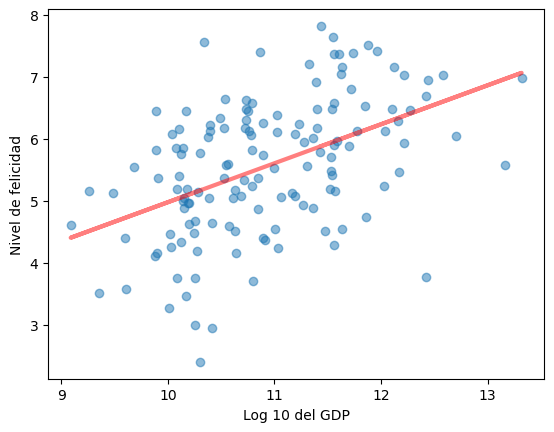

In [73]:
plt.scatter(X,Y , alpha = 0.5)

plt.ylabel("Nivel de felicidad")
plt.xlabel("Log 10 del GDP")
yHat=B0 + B1*x
# Agrega la línea que representa al modelo con la función plot
plt.plot(x,yHat,c = "r", linewidth =3,alpha =0.5)
# Muestra la gráfica usando la función show
plt.show()

5. Ahora calculamos el RSS del modelo y lo imprimimos. 

In [76]:
# Calcula el RSS haciendo uso de la función "sum" y el operador "**"
RSS= sum((y-yHat)**2)
# Imprime el valor de RSS
print("RSS = ", RSS)

RSS =  131.3738317732635


6. Ahora calculamos el error estándar e intervalo de confianza de  $\beta_1$

Primero, generamos la variable `n` donde se almacena la cantidad de observaciones en este estudio mediante la función `len`.Almacenando el resultado en una variable de nombre `SEB1`. La raíz cuadrada con la función `sqrt` de numpy. Por último, imprimiremos en consola el valor calculado del error estándar de $\beta_1$ y su interpretación.


In [103]:
# Almacena en una variable de nombre "n" la cantidad de observaciones
n = len(x)


# Calcula el error estándar de B1 apoyándode de la función "sqrt" de numpy
SEB1 = np.sqrt(RSS / ((n-2)*sum((x-xBar)**2)))

# Imprime el valor de SEB1
print(SEB1, " es el valor del error estándar")
print("El coeficiente que estimamos está en promedio a ", SEB1 ," unidades de distancia de su valor óptimo ")
print(" ")

0.09983378435340727  es el valor del error estándar
El coeficiente que estimamos está en promedio a  0.09983378435340727  unidades de distancia de su valor óptimo 
 


Ahora  para el intervalo de confianza que nos puede dar una mejor respuesta sobre la relación directa entre la variable de entrada y de salida. Calcularemos el percentil 97.5 (o 2.5) de una distribución t de *Student* con $n - 2$ grados de libertad. 

La manera más sencilla de calcularlo es con la función `t.interval` de la librería scipy.stats, 
La función en cuestión tendrá como parámetros `alpha`, el nivel de confianza, con un valor de 0.95, y `df`, los grados de libertad, con un valor de $n-2$. Almacena el resultado en una variable de nombre `per`. Como resultado, dicha función entregará un arreglo con dos valores, el percentil 2.5 y el percentil 97.5. En este caso, nos quedaremos con el segundo, por lo que al final de la función agregaremos el término `[1]` que denota que seleccionaremos el segundo elemento del arreglo.

Una vez calculado dicho valor, podemos obtener el intervalo de confianza a partir de la siguiente ecuación. Almacenamos el límite inferior en una variable de nombre `CIlow` y el límite superior en una variable de nombre `CIhigh`. Finalmente, imprimimos en consola el intervalo de confianza del 95%.<br><br>

<img src = 'Ecuacion.png'>

In [109]:
# Calcula el percentil 97.5 con la función "t.interval"
per = st.t.interval(confidence = 0.95, df = n-2)[1]   # Se necesitaba usar confidence en vez de alpha debido posiblemente a la version de scipy
# Calcula el límite inferior
Cllow = B1 - per*SEB1

# Calcula el límite superios
Clhigh = B1 + per*SEB1
# Imprime el intervalo de confianza
print("Intervalo de confianza : (",Cllow,",",Clhigh,")")


Intervalo de confianza : ( 0.4307393313073311 , 0.8255176004547504 )


Ahora para determina si la asociacion entre la felicidad y el GDP es significativa en esta población.

Calcularemos el estadístico ***t*** y su ***p-value*** asociado. Almacenamos la información en una variable de nombre `t`. Para calcular el *p-value* asociado a dicho estadístico, usaremos la función `t.sf` de la librería scipy.stats . Dicha función tendrá como parámetros el valor absoluto de nuestro estadístico, `t`, y los grados de libertad, definidos como $n - 2$. El valor absoluto se puede calcular con la función `abs`. La función `t.sf` calcula la probabilidad ante una prueba de 1 sola cola; ya que nos interesa realizar una prueba de 2 colas (nos es igualmente relevante si el valor es muy bajo o muy alto), multiplicaremos por dos el resultado de la función. Finalmente, imprime en consola ambos resultados.<br><br>

In [118]:
# Calcula el estadístico t
t = B1 / SEB1
# Calcula el p-value asociado
p = st.t.sf(abs(t),n-2)*2
# Muestra en consola el resultado del estadístico t
print("t-statistic =",t)
# Muestra en consola el resultado del p-value
print("p-value =",p)

t-statistic = 6.291742519320846
p-value = 3.825717831968765e-09


Con esto, demostramos que bajo un estándar del 95% de probabilidad, podemos confirmar que sí existe una asociación entre entre la felicidad y el GDP. Esto, gracias a que el *p-value* asociado al estadístico *t* calculado es menor a **0.05**. 

7. Calculamos ahora el residual standard error y la 𝑅2 del modelo calculando antes el *total sum of squares o TSS*.

In [126]:
# Calcula el RSE
RSE=np.sqrt(RSS/(n-2))
# Calcula el TSS
TSS=sum((y-yBar)**2)
# Calcula el R^2
R2=1-RSS/TSS
# Imprime el valor del RSE
print("Residual standard error =",RSE)
# Imprime el valor de R^2
print("R^2= ",R2)

Residual standard error = 0.9721807858537376
R^2=  0.22166361654970657


Aunque el **R²** es bajo (solo del 22%), los valores de **t-statistic** y **p-value** sugieren que el modelo es estadísticamente significativo. En resumen, sí se puede decir que hay una asociación estadísticamente significativa entre los niveles de felicidad y el logaritmo base 10 del GDP.

8. Finalmente usamos la funcion `OLS( )` de la librería statsmodels.api para verificar que los resultados de todos los puntos anteriores son los esperados.
Primero, almacenamos el resultado de dicha función en una variable de nombre `model`, usando como parámetros `y` y una versión modificada de `x`. Para esta función, incluimos el coeficiente $\beta_0$ en el modelo,  como segundo parámetro el resultado de aplicar la función `add_constant()` (de la misma librería) a la variable `x`. Básicamente,estamos solicitando a la función que genera una ecuación para `y` que dependa tanto de `x` como de una constante.

Posteriormente, usa la función `fit()` de esta misma librería, para ajustar el modelo a los datos especificados, almacenando el resultado en la variable `results`. Finalmente, imprime en pantalla el resultado de aplicar la función `summary()` a la variable `results`.

In [135]:
# Genera un ordinary least squares, recuerda usar la función add_constant()
model= sm.OLS(y,sm.add_constant(x))
# Ajusta el modelo
results = model.fit()
# Imprime el resultado de aplicar la función summary() a la variable results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        18:14:10   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

In [137]:
# Si el p-value es muy pequeño (0.000), puedes observar más cifras significativas con:
print("P-values: ", results.pvalues)

# Para revisar el RSE (error estándar de la regresión)
print("RSE: ", results.scale**0.5)

P-values:  const    2.357975e-01
GDP      3.825718e-09
dtype: float64
RSE:  0.9721807858537376



La relación entre el logaritmo del GDP y los niveles de felicidad sigue siendo estadísticamente significativa a pesar de un R² bajo, ya que el p-value de la variable independiente (GDP) es muy pequeño.
El intercepto tiene un p-value más alto, lo que indica que la constante en el modelo no tiene un impacto significativo.
El RSE de 0.972 es un buen valor, lo que sugiere que el modelo no tiene un error demasiado grande en sus predicciones.

**Firma de Honor:** *Doy mi palabra que he realizado esta actividad con integridad académica.*